In [51]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading DF
df=pd.read_csv('LASP_data.csv')

In [3]:
# First 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Last 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Size of df
df.size

7982

In [6]:
# rows*cols in df
df.shape

(614, 13)

In [7]:
# Base information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
len(df.Loan_ID.unique())

614

In [9]:
# Because we don't reqire index
df.drop('Loan_ID',axis=1,inplace=True)

In [10]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
# There is slight data imbalance
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
#Null Values in df
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# <<<<<<<<<< Need to use encoder to encode non-numerical features to numerical features >>>>>>>>>>>>>
for col in df.columns:
    if df[col].dtypes=='object':
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])

In [14]:
df['Gender'].fillna(df['Gender'].mode(), inplace=True)
df['Married'].fillna(df['Married'].mean(), inplace=True)
df['Dependents'].fillna(df['Dependents'].mean(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mean(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [15]:
#Null Values in df
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [18]:
# Unique values in all columns
for column in df.columns:
        print(str(column)+" : " +str(df[column].unique()))
        print(df[column].value_counts())

Gender : [1 0 2]
1    489
0    112
2     13
Name: Gender, dtype: int64
Married : [0 1 2]
1    398
0    213
2      3
Name: Married, dtype: int64
Dependents : [0 1 2 3 4]
0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64
Education : [0 1]
0    480
1    134
Name: Education, dtype: int64
Self_Employed : [0 1 2]
0    500
1     82
2     32
Name: Self_Employed, dtype: int64
ApplicantIncome : [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  

In [19]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Credit_History'>

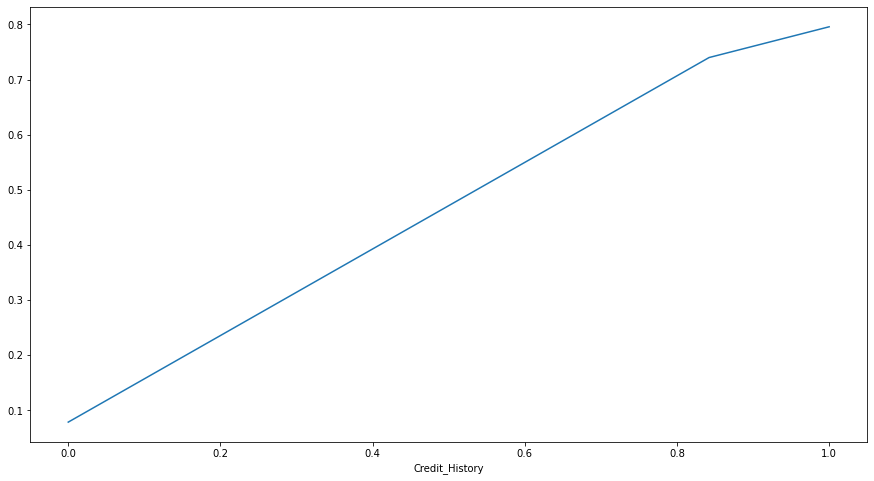

In [20]:
# Distribution of Credit_History vs Loan_Status
D=df.groupby('Credit_History').mean()
plt.figure(figsize=(15,8))
D['Loan_Status'].plot()

(array([42.,  0.,  0.,  7.,  2., 24., 17., 20.,  8., 84.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

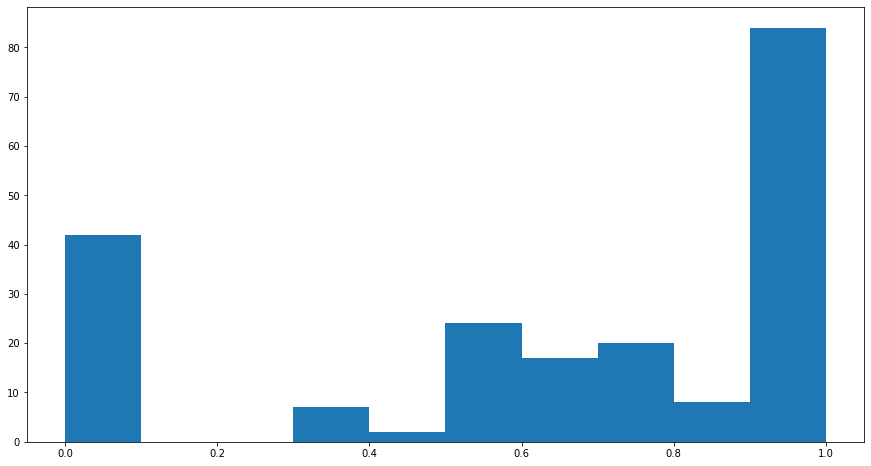

In [21]:
# Distribution of LoanAmount vs Loan_Status
D=df.groupby('LoanAmount').mean()
plt.figure(figsize=(15,8))
plt.hist(D['Loan_Status'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f1cb66a4700>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1cb66a45b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f1cb66a4be0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f1cb66a4f10>}

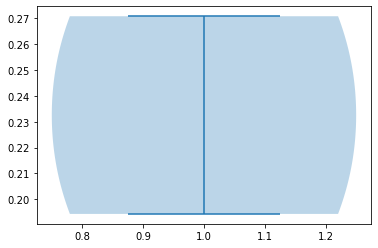

In [22]:
# Distribution of Education vs Loan_Status
D=df.groupby('Loan_Status').mean()
plt.violinplot(D['Education'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [24]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


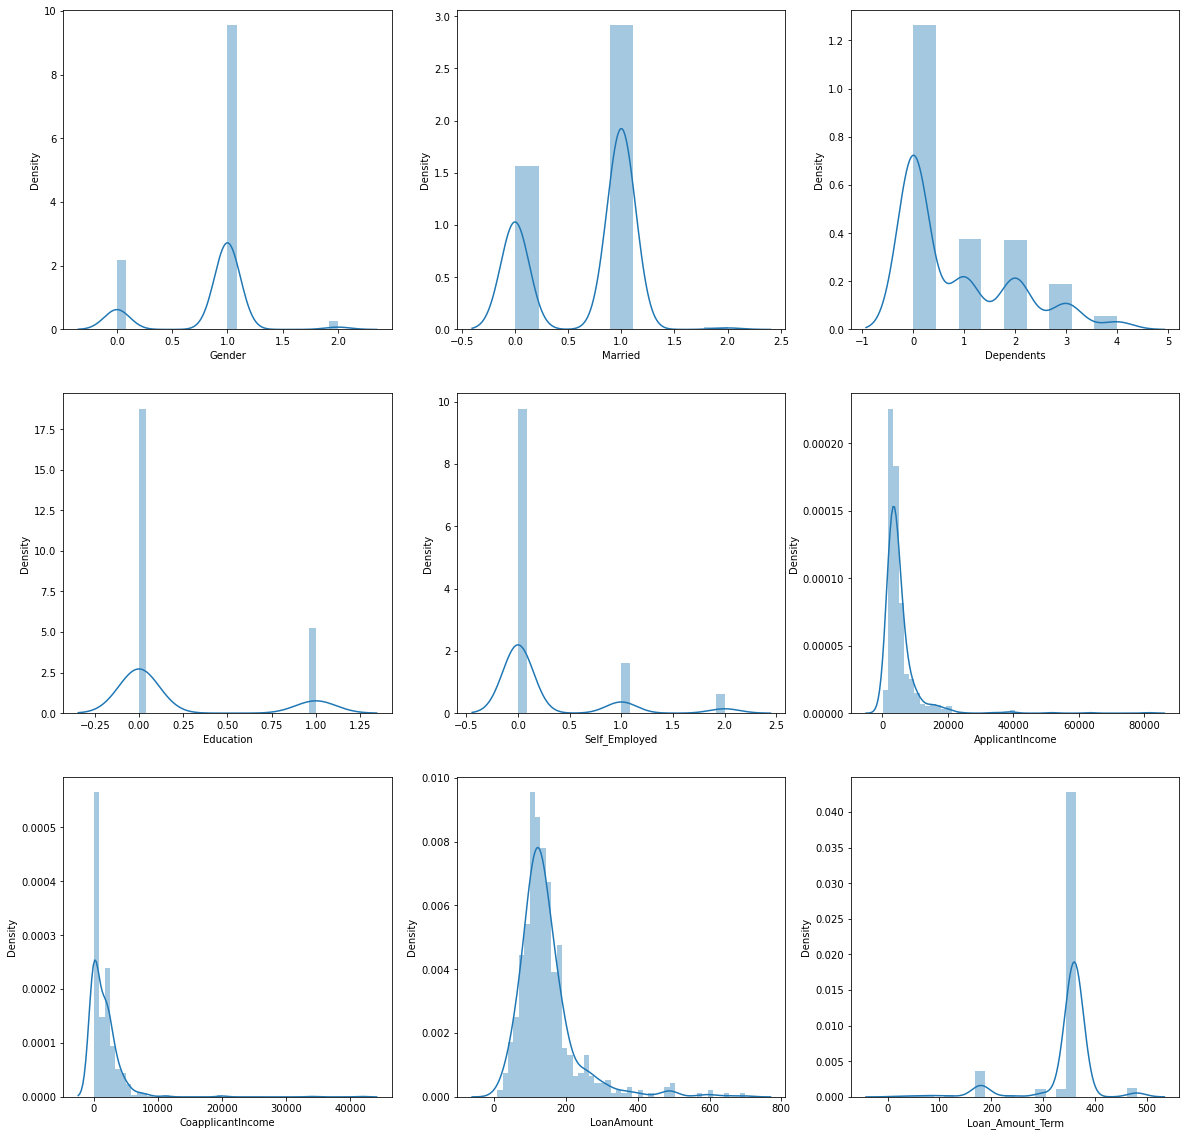

In [25]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

- signs of skew and outliers seen

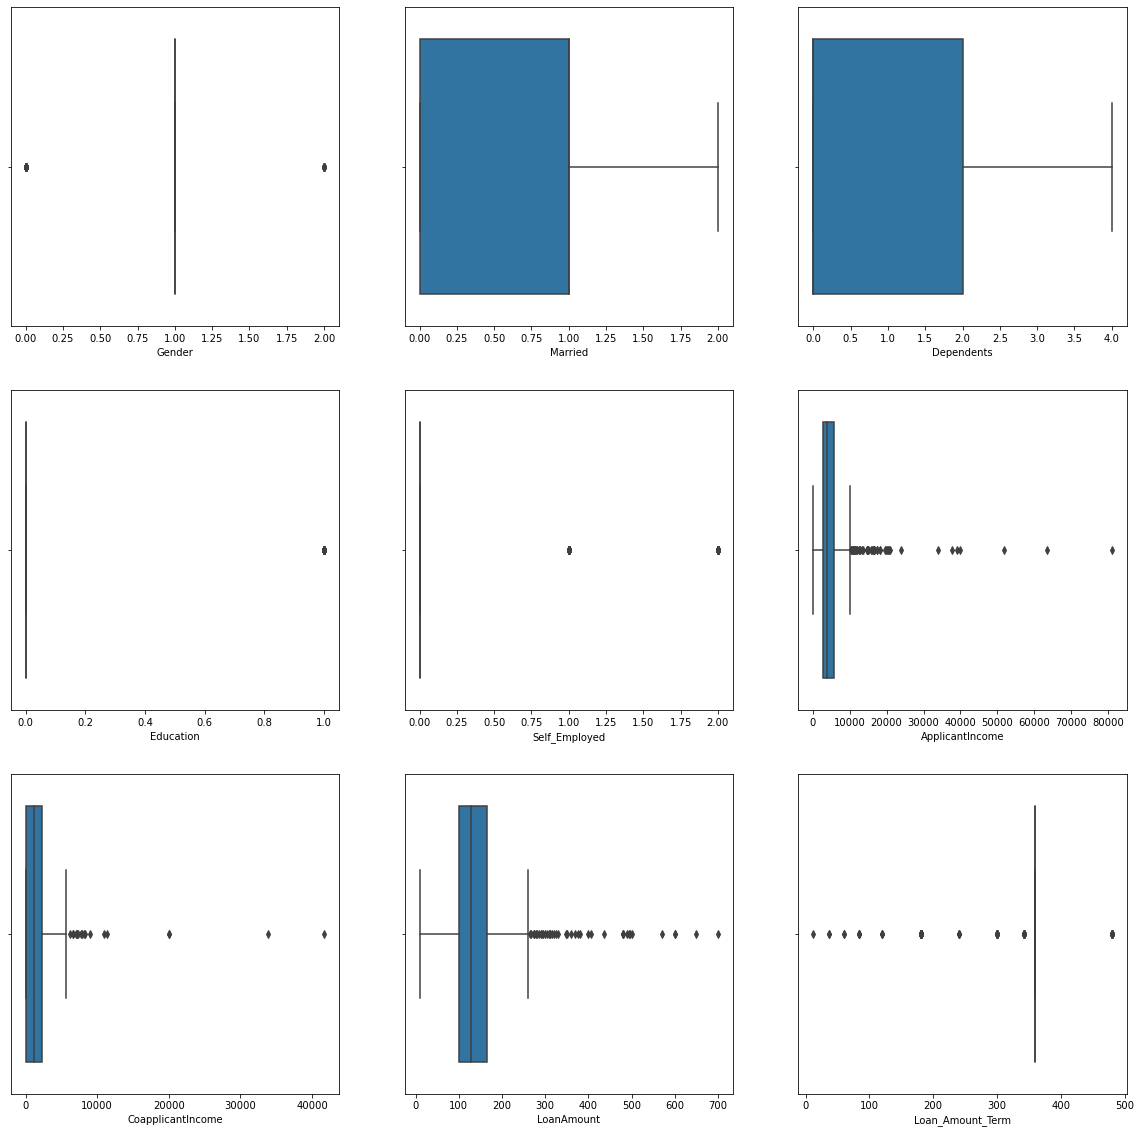

In [26]:
# Detecting Outliers
plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1

In [27]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
        126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
        218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
        336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
        447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
        575, 579, 581, 585, 600, 600, 601, 604]),
 array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
        6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
        4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
        4, 6, 8, 4, 6, 4, 7]))

In [28]:
df.shape

(614, 12)

In [29]:
# Dropping rows where z>3
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [30]:
df.shape

(548, 12)

 - 614-548 = 66 rows dropped || (66*100)/614 = 10.74% Data Loss

In [33]:
# Skew values before treatment
df.skew()

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      2.115295
CoapplicantIncome    1.369775
LoanAmount           1.103178
Loan_Amount_Term    -2.029308
Credit_History      -1.862149
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

In [35]:
# separating labels and data to predict primary fuel
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

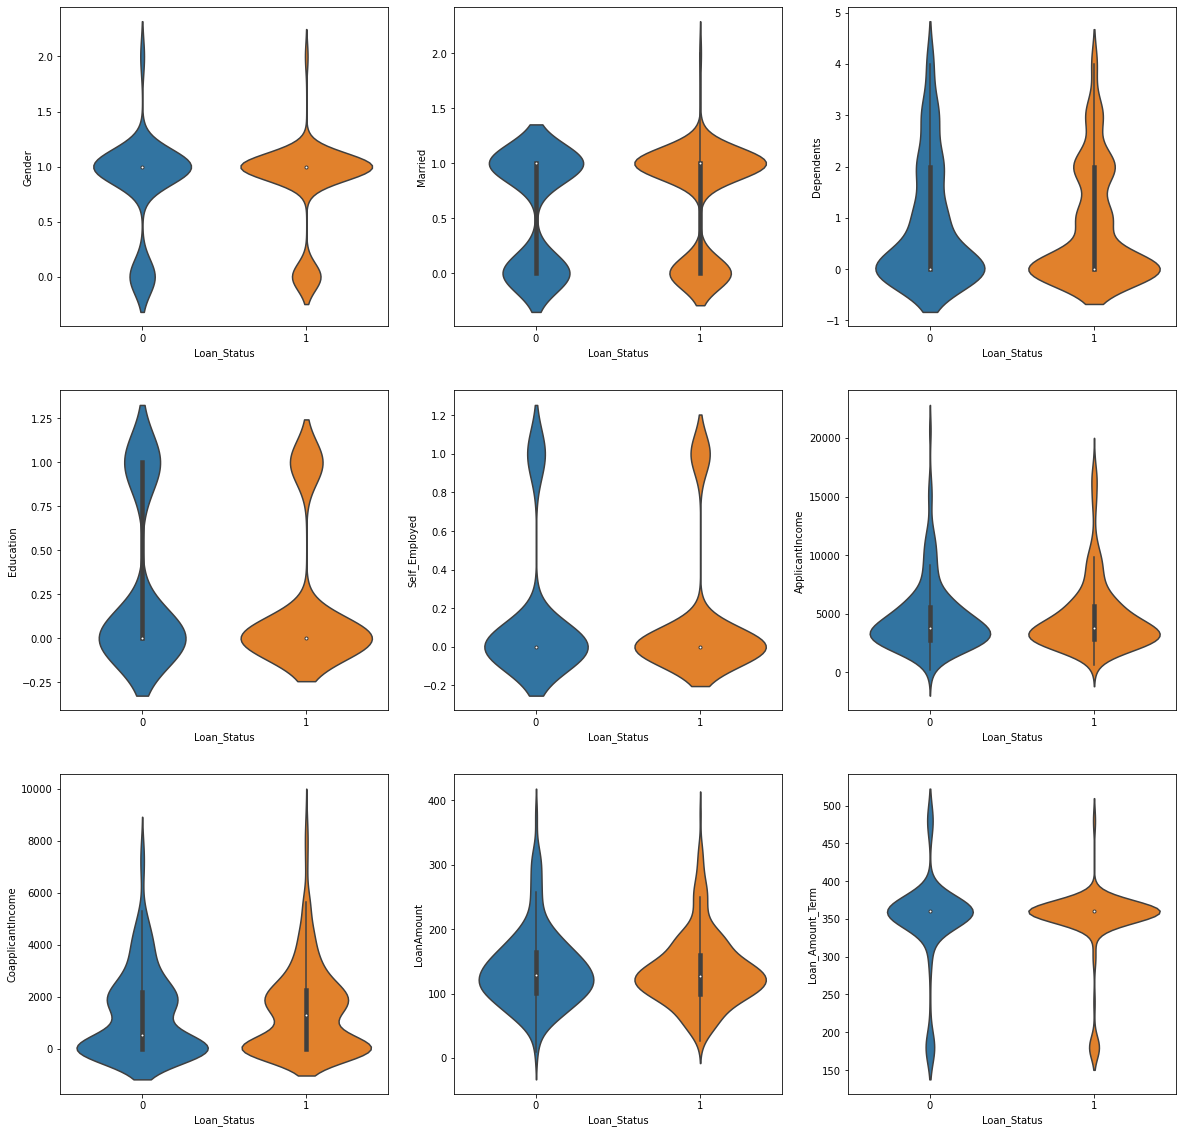

In [37]:
# Relation between features and labels using violin plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.violinplot(y,x[column])
    plotnumber+=1

In [41]:
# Treating data imbalance
from imblearn.over_sampling import ADASYN
from collections import Counter

counter = Counter(y)
print(counter)
oversample = ADASYN()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({1: 377, 0: 171})
Counter({1: 377, 0: 370})


In [42]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(x)

In [43]:
# Skew values after treatment
data_new=pd.DataFrame(data_new,columns=x.columns)
data_new.skew()

Gender               0.112962
Married             -0.236328
Dependents           0.496446
Education            1.496746
Self_Employed        2.640112
ApplicantIncome     -0.022505
CoapplicantIncome   -0.160909
LoanAmount           0.043287
Loan_Amount_Term     0.542666
Credit_History      -0.919490
Property_Area       -0.100137
dtype: float64

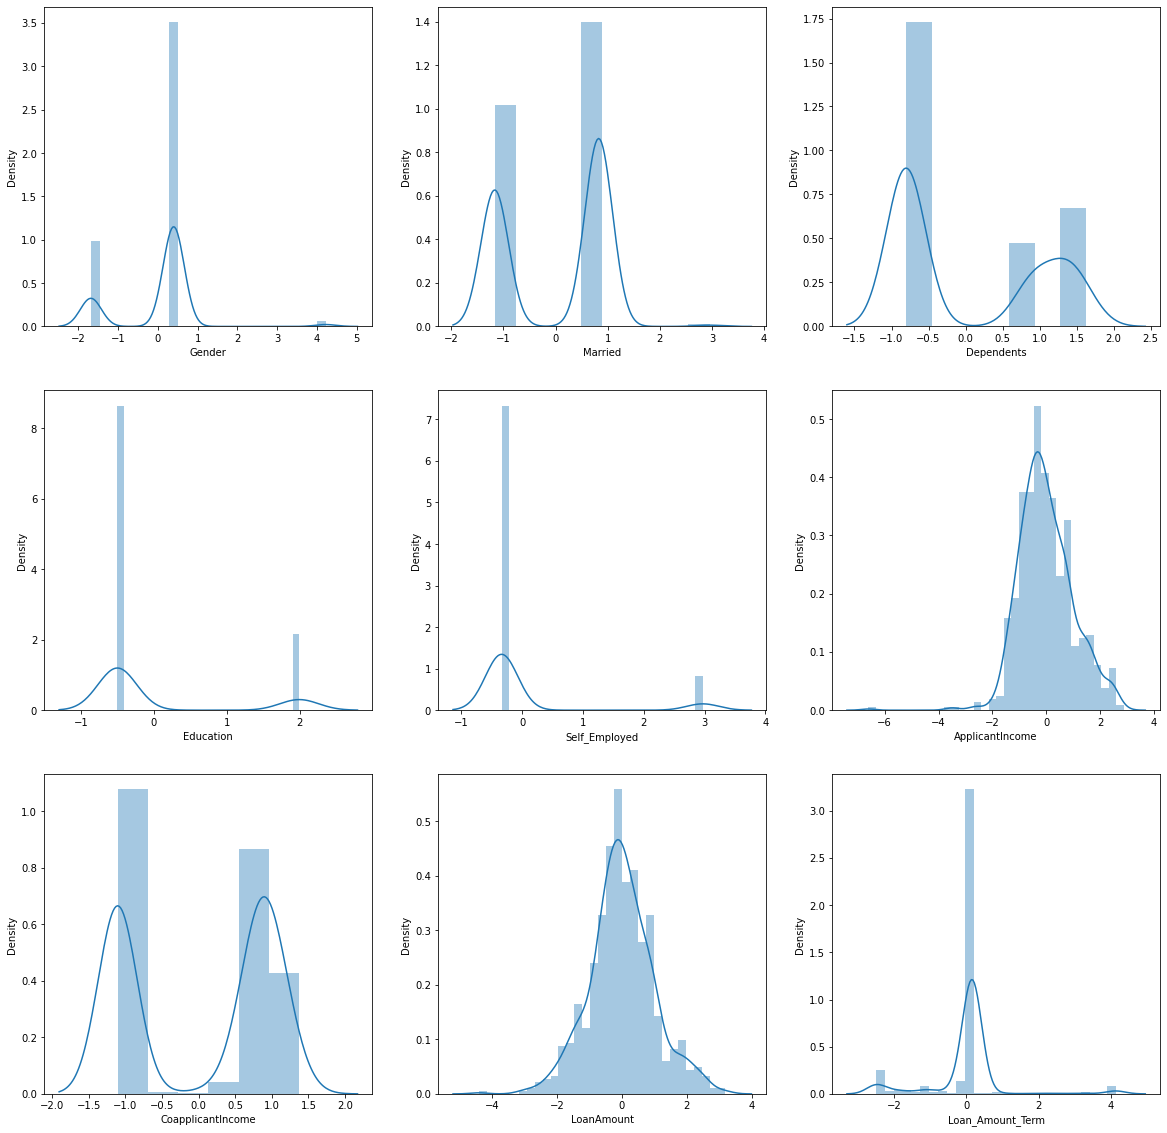

In [44]:
# Distibution after fixing skew and outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [45]:
x = data_new

## Model 

In [46]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  6% |  4% |


In [47]:
# Finding best random state
min_squared_error = 0
max_random_state = 1
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    model=XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  1


In [53]:
# List of regressors and scorers

en = ElasticNet()
lr = LogisticRegression(random_state = 1)
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ar = AdaBoostRegressor(random_state=1)
gbr= GradientBoostingRegressor(random_state=1)
sr = SVR()
lgr=LGBMRegressor(random_state=1)
xgbr = XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state = 1)

m_list= [en,lr,dtr,rfr,ar,gbr,sr,lgr,xgbr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [54]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [55]:
# Training models and getting CV score
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  0.5000000511568237
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -0.5374382125379926
difference between model score and cross validation score:  0.037438161381168955




LogisticRegression(random_state=1)
Root_mean_squared_error:  0.4682428183094704
cross validation scores below:--  
 LogisticRegression(random_state=1)
root_mean_squared_error:  -0.471971030262877
difference between model score and cross validation score:  0.0037282119534066127




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  0.4905524551257964
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -0.47176724701778144
difference between model score and cross validation score:  -0.018785208108014984




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  0.362864421286097
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -0.36912

 - Chose LGBMRegressor because of the least difference

## Hyper-Parameter Tuning (HPT) 

In [61]:
# Parameter Grid
grid_param = {'boosting_type':['gbdt','dart','goss','rf'],
              'learning_rate':[x for x in np.linspace(0.00001, 0.1, num = 100)],
              'n_estimators':[int(x) for x in np.linspace(100, 1200, num = 12)]}

In [62]:
grid_search=GridSearchCV(lgr,param_grid=grid_param,cv=5,n_jobs=15,verbose = 1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1), n_jobs=15,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'learning_rate': [1e-05, 0.00102, 0.00203, 0.00304,
                                           0.00405, 0.00506, 0.00607,
                                           0.0070799999999999995, 0.00809,
                                           0.0091, 0.010110000000000001,
                                           0.01112, 0.01213, 0.01314, 0.01415,
                                           0.01516, 0.01617, 0.01718, 0.01819,
                                           0.019200000000000002,
                                           0.020210000000000002, 0.02122,
                                           0.02223, 0.02324, 0.02425, 0.02526,
                                           0.02627, 0.027280000000000002,
                                           0.02829, 0.0293, ...],
                         'n_estimators': [10

In [63]:
# List of best parameters
grid_search.best_params_

{'boosting_type': 'gbdt', 'learning_rate': 0.09596, 'n_estimators': 100}

In [64]:
# Fitting model with best params
m = LGBMRegressor(random_state=1,boosting_type = 'gbdt',learning_rate = 0.09596,n_estimators = 100)
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,x,y,cv=5,scoring='neg_root_mean_squared_error').mean())

LGBMRegressor(learning_rate=0.09596, random_state=1)
Root_mean_squared_error:  0.38884664022914195
cross validation scores below:--  
 LGBMRegressor(learning_rate=0.09596, random_state=1)
root_mean_squared_error:  -0.3800383391559394
difference between model score and cross validation score:  -0.008808301073202573


## Model Saving

In [65]:
import joblib

joblib.dump(m,'LGBMRegressor_best.obj')

['LGBMRegressor_best.obj']

In [66]:
joblib.load('LGBMRegressor_best.obj')

LGBMRegressor(learning_rate=0.09596, random_state=1)